In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from datetime import datetime
import matplotlib.ticker as mticker
import textwrap as tw

In [2]:
df = pd.read_csv('anapa2017.csv')

### Функция определения цена на топлива для каждого рейса

In [3]:
def fuel_price(month):
    if month == 1:
        return 41435  # по данным росавиации, единица измерения - рубль
    if month == 2:
        return 39553  # по данным росавиации, единица измерения - рубль
    else:
        return 47101  # по данным росавиации, единица измерения - рубль

### Функция расчёта расхода топлива за один рейс

In [4]:
def fuel_consumption(model, time_flight):
    consumption_737 = 2.6  # единица измерения - тонн/час
    consumption_100 = 1.8  # единица измерения - тонн/час
    if model == 'Boeing 737-300':
        consumption = consumption_737 * time_flight
    else:
        consumption = consumption_100 * time_flight
    return consumption

### Функция графического отображения выбросов

In [5]:
def graph_out(kind):
    fig = plt.figure(figsize=[10, 50])
    count = 1
    for each in df.select_dtypes(kind).columns:
        ax = fig.add_subplot(15, 2, count)
        plt.title(each)

        perc25 = df[each].quantile(0.25)
        perc75 = df[each].quantile(0.75)
        IQR = perc75 - perc25

        df[each].loc[df[each].between(
            perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label='IQR')
        df[each].loc[(df[each] < perc25 - 1.5*IQR) |
                     (df[each] > perc75 + 1.5*IQR)].hist(label='выбросы')

        count += 1

        plt.legend()

### Функция построения круговой диаграммы

In [6]:
def grath_ring(df):

    for column in df.columns[0:2]:
        plt.title(column, fontsize=14)

        size = df[column]
        names = ['Belgorod', 'Moscow']
        tone = ['lightskyblue', 'dodgerblue']
        textprops = dict(size=14)

        my_circle = plt.Circle((0, 0), 0.4, color='white')

        plt.pie(size,
                labels=names,
                labeldistance=1.1,
                wedgeprops={'linewidth': 7, 'edgecolor': 'white'},
                colors=tone,
                autopct='%.f%%',
                pctdistance=0.7,
                textprops=textprops)

        p = plt.gcf()
        p.gca().add_artist(my_circle)

        p.savefig(fname=column, bbox_inches='tight')
        plt.show()

### Функции построения столбчатых диаграмм

In [7]:
def grath_aircraft(df):
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])

    axes.bar(x=df.index, height=df.Belgorod,
             width=-0.3, align='edge', label='Белгород', color='skyblue')
    axes.bar(x=df.index, height=df.Moscow,
             width=0.3, align='edge', label='Москва', color='dodgerblue')

    axes.legend(loc=9, fontsize=14)

    axes.xaxis.set_major_locator(mticker.FixedLocator([0, 1, 2]))
    axes.set_xticklabels(["\n".join(tw.wrap('Общее количество мест', 17)),
                          "\n".join(tw.wrap('Количество мест бизнес-класса', 17)),
                          "\n".join(tw.wrap('Количество мест эконом-класса', 17))],
                         fontsize=12)

    rects = axes.patches
    labels = []

    for j in range(df.shape[1]):
        for i in range(df.shape[0]):
            labels.append(df.values[i][j])

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
                  ha='center', va='bottom', fontsize=12)

    plt.yticks([])
    plt.box(on=None)
    fig.savefig('grath_aircraft.png', bbox_inches='tight')

In [8]:
def grath_passengers(df):
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    axes.bar(x=df.index, height=df.Belgorod,
             width=-0.3, align='edge', label='Белгород', color='skyblue')
    axes.bar(x=df.index, height=df.Moscow,
             width=0.3, align='edge', label='Москва', color='dodgerblue')

    axes.legend(loc=2, fontsize=14)

    axes.xaxis.set_major_locator(mticker.FixedLocator([0, 1, 2]))
    axes.set_xticklabels(["\n".join(tw.wrap('Количество пассажиров бизнесс-класса', 17)),
                          "\n".join(tw.wrap('Общее количество пассажиров', 17)),
                          "\n".join(tw.wrap('Количество пассажиров эконом-класса', 17))],
                         fontsize=12)

    rects = axes.patches
    labels = []
    for j in range(df.shape[1]):
        for i in range(df.shape[0]):
            labels.append(df.values[i][j])

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
                  ha='center', va='bottom', fontsize=12)

    plt.yticks([])
    plt.box(on=None)
    fig.savefig('passengers_grath.png', bbox_inches='tight')

In [9]:
def grath_money(df):
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])

    axes.bar(x=df.index, height=df.Belgorod,
             width=-0.3, align='edge', label='Белгород', color='skyblue')
    axes.bar(x=df.index, height=df.Moscow,
             width=0.3, align='edge', label='Москва', color='dodgerblue')

    axes.legend(loc=2, fontsize=14)

    axes.xaxis.set_major_locator(mticker.FixedLocator([0, 1, 2]))
    axes.set_xticklabels(["\n".join(tw.wrap('Затраты на топливо, млн.руб.', 17)),
                          "\n".join(tw.wrap('Прибыль, млн.руб.', 17)),
                          "\n".join(tw.wrap('Доход от продажи билетов, млн.руб.', 17))],
                         fontsize=12)

    rects = axes.patches
    labels = []
    for j in range(df.shape[1]):
        for i in range(df.shape[0]):
            labels.append(round(df.values[i][j]/1000000, 2))

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
                  ha='center', va='bottom', fontsize=12)

    plt.yticks([])
    plt.box(on=None)
    fig.savefig('grath_money.png', bbox_inches='tight')

In [10]:
def money_intime(df1, df2):
    fig = plt.figure(figsize=[20, 5])
    axes = fig.add_axes([0, 0, 1, 1])
    axes.bar(df1.scheduled_departure,
             df1.profit/1000000,
             label='Москва',
             color='dodgerblue')
    axes.bar(df2.scheduled_departure,
             df2.profit/1000000,
             label='Белгород',
             color='skyblue')

    axes.legend(fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)

    axes.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    dateLocator = mticker.MultipleLocator(1)
    axes.xaxis.set_major_locator(dateLocator)
    fig.autofmt_xdate(rotation=90, ha='center')

    plt.grid(True, axis='both')
    plt.box(on=None)
    plt.show()
    fig.savefig('money_intime.png', bbox_inches='tight')

### Анализ

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   flight_no            118 non-null    object 
 2   scheduled_departure  118 non-null    object 
 3   scheduled_arrival    118 non-null    object 
 4   departure_airport    118 non-null    object 
 5   city_out             118 non-null    object 
 6   longitude_out        118 non-null    float64
 7   latitude_out         118 non-null    float64
 8   arrival_airport      118 non-null    object 
 9   city_in              118 non-null    object 
 10  longitude_in         118 non-null    float64
 11  latitude_in          118 non-null    float64
 12  status               118 non-null    object 
 13  aircraft_code        118 non-null    object 
 14  model                118 non-null    object 
 15  count_seat           118 non-null    int

Нет пустых строк

### Смена формата переменных

In [12]:
df.scheduled_departure = pd.to_datetime(df.scheduled_departure)
df.scheduled_arrival = pd.to_datetime(df.scheduled_arrival)
df.actual_departure = pd.to_datetime(df.actual_departure)
df.actual_arrival = pd.to_datetime(df.actual_arrival)

### Создание новых переменных

#### Месяц полёта

In [13]:
df['month'] = df.actual_departure.apply(lambda x: x.month)

#### День недели полёта полёта

In [14]:
df['dayofweek'] = df.scheduled_departure.dt.dayofweek

#### Цена на топливо

In [15]:
df['fuel_price'] = df.month.apply(lambda x: fuel_price(x))

#### Расход топлива за полёт, т

In [16]:
df['fuel_consumption'] = round(df.apply(lambda x: fuel_consumption(x.model, x.time_flight), axis=1),2)

#### Расходы на топливо

In [17]:
df['fuel_costs'] = round(df.fuel_price*df.fuel_consumption, 2)

#### Разница между расходами на топливо и выручкой от продажи билетов

In [18]:
df['profit'] = round(df.total_amount - df.fuel_costs, 2)

#### Наполняемость салона (%)

In [19]:
df['occupancy'] = round(df.count_pass/df.count_seat, 2)

#### Процент занятия мест эконом-класса (%)

In [20]:
df['occupancy_class_e'] = round(df.economy_pass/df.seat_economy, 2)

#### Процент занятия мест бизнесс-класса (%)

In [21]:
df['occupancy_class_b'] = round(df.business_pass/df.seat_business, 2)

#### Условная окупаемость
Доля выручки от продажи билетов в затратах на топливо

In [22]:
df['payback'] = round(df.profit/df.fuel_costs, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   flight_id            118 non-null    int64              
 1   flight_no            118 non-null    object             
 2   scheduled_departure  118 non-null    datetime64[ns, UTC]
 3   scheduled_arrival    118 non-null    datetime64[ns, UTC]
 4   departure_airport    118 non-null    object             
 5   city_out             118 non-null    object             
 6   longitude_out        118 non-null    float64            
 7   latitude_out         118 non-null    float64            
 8   arrival_airport      118 non-null    object             
 9   city_in              118 non-null    object             
 10  longitude_in         118 non-null    float64            
 11  latitude_in          118 non-null    float64            
 12  status               1

Пустых строк нет

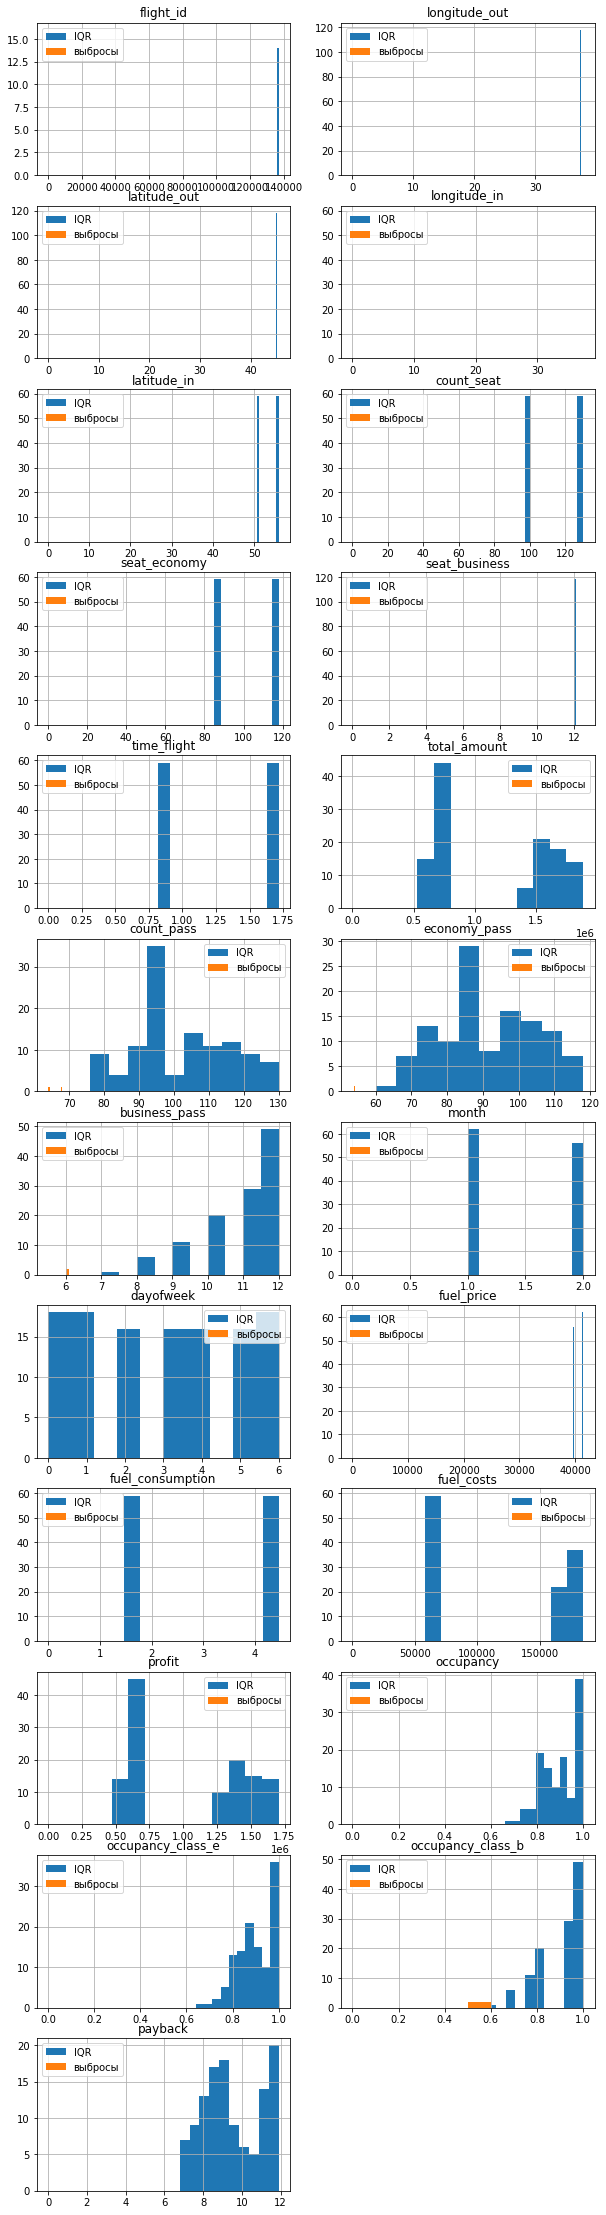

In [24]:
graph_out(['int64','float64'])

Данные почти не содержат выбросов, но нуждаются в нормализации.

#### Информация о времени вылета и прилёта

In [25]:
df.status.value_counts()

Arrived    118
Name: status, dtype: int64

выборка содержит информацию только о совершённых рейсах

In [26]:
df.scheduled_departure.dt.hour.value_counts()

9     59
10    59
Name: scheduled_departure, dtype: int64

Все рейся летают в одно время суток

In [27]:
df.dayofweek.value_counts()

0    18
1    18
6    18
2    16
3    16
4    16
5    16
Name: dayofweek, dtype: int64

Все рейсы распределены по неделе равномерно. В понедельник, вторник и субботу рейсов не значительно больше.

#### Информация о задержке рейса

In [28]:
(df.actual_departure - df.scheduled_departure).astype('timedelta64[m]').value_counts()

3.0      31
2.0      24
1.0      17
4.0      14
5.0      11
0.0       6
6.0       5
7.0       4
8.0       3
207.0     1
162.0     1
197.0     1
dtype: int64

In [29]:
(df.actual_arrival - df.scheduled_arrival).astype('timedelta64[m]').value_counts()

 3.0      25
 2.0      25
 4.0      18
 1.0      17
 0.0       7
 6.0       7
 7.0       6
 5.0       5
 8.0       3
-1.0       2
 207.0     1
 162.0     1
 198.0     1
dtype: int64

In [30]:
df[((df.actual_arrival-df.scheduled_arrival).astype('timedelta64[m]') > 100)]

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,city_out,longitude_out,latitude_out,arrival_airport,city_in,...,month,dayofweek,fuel_price,fuel_consumption,fuel_costs,profit,occupancy,occupancy_class_e,occupancy_class_b,payback
35,136345,PG0252,2017-01-24 10:05:00+00:00,2017-01-24 11:45:00+00:00,AAQ,Anapa,37.347301,45.002102,SVO,Moscow,...,1,1,41435,4.33,179413.55,1338186.45,0.83,0.85,0.67,7.46
67,136632,PG0480,2017-01-07 09:25:00+00:00,2017-01-07 10:15:00+00:00,AAQ,Anapa,37.347301,45.002102,EGO,Belgorod,...,1,5,41435,1.53,63395.55,650904.45,0.94,0.94,0.92,10.27
101,136855,PG0480,2017-01-11 09:25:00+00:00,2017-01-11 10:15:00+00:00,AAQ,Anapa,37.347301,45.002102,EGO,Belgorod,...,1,2,41435,1.50,62152.50,640147.50,0.90,0.88,1.00,10.30


#### Информация о направлениях

In [31]:
df.city_in.value_counts()

Belgorod    59
Moscow      59
Name: city_in, dtype: int64

Авиаперелёты реализуются два направления - в Москву и в Белгород

In [32]:
df.model.value_counts()

Sukhoi Superjet-100    59
Boeing 737-300         59
Name: model, dtype: int64

Авиапарк компании представлен двумя моделями, Boeing 737-300 и Sukhoi Superjet-100, в равных количествах.

#### Сравнение средних параметров

In [33]:
df.groupby(['model', 'city_in'])[['count_seat', 'seat_economy', 'seat_business',
                                  'count_pass', 'economy_pass', 'business_pass',
                                  'occupancy', 'occupancy_class_e', 'occupancy_class_b',
                                  'total_amount', 'fuel_costs', 'profit', 'payback']].mean()

,,count_seat,seat_economy,seat_business,count_pass,economy_pass,business_pass,occupancy,occupancy_class_e,occupancy_class_b,total_amount,fuel_costs,profit,payback
model,city_in,,,,,,,,,,,,,
Boeing 737-300,Moscow,130.0,118.0,12.0,113.118644,102.610169,10.508475,0.870000,0.869661,0.876441,1.642576e+06,175341.897966,1.467234e+06,8.374746
Sukhoi Superjet-100,Belgorod,97.0,85.0,12.0,90.186441,79.118644,11.067797,0.930339,0.931356,0.922373,7.104356e+05,60916.200508,6.495194e+05,10.666949


#### Сравнение суммовых значений

In [34]:
data_table_ring = df.groupby(['city_in'])[['count_pass', 'count_seat',
                                           'economy_pass', 'seat_economy',
                                           'business_pass', 'seat_business',
                                           'time_flight', 'fuel_consumption',
                                           'profit', 'fuel_costs']].sum()

data_table_ring['occupancy'] = round(data_table_ring.count_pass/data_table_ring.count_seat, 2)
data_table_ring['occupancy_class_e'] = round(data_table_ring.economy_pass/data_table_ring.seat_economy, 2)
data_table_ring['occupancy_class_b'] = round(data_table_ring.business_pass/data_table_ring.seat_business, 2)
data_table_ring['payback'] = round(data_table_ring.profit/data_table_ring.fuel_costs, 2)

data_table_ring = data_table_ring.drop(columns=['count_pass', 'count_seat',
                                                'economy_pass', 'seat_economy',
                                                'business_pass', 'seat_business',
                                                'profit', 'fuel_costs'])
data_table_ring

,time_flight,fuel_consumption,occupancy,occupancy_class_e,occupancy_class_b,payback
city_in,,,,,,
Belgorod,49.250000,88.65,0.93,0.93,0.92,10.66
Moscow,98.166667,255.18,0.87,0.87,0.88,8.37


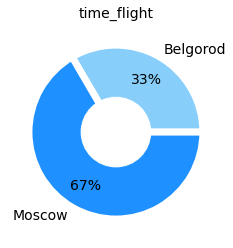

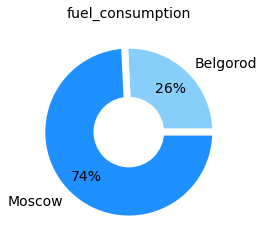

In [35]:
grath_ring(data_table_ring)

In [36]:
data_image_1 = df.pivot_table(index=['city_in'],
                              values=['count_seat',
                                      'seat_economy',
                                      'seat_business'],
                              aggfunc='mean').T
data_image_1

city_in,Belgorod,Moscow
count_seat,97,130
seat_business,12,12
seat_economy,85,118


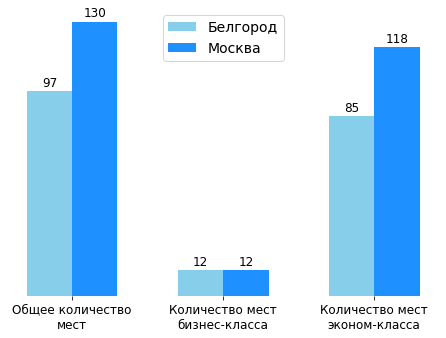

In [37]:
grath_aircraft(data_image_1)

In [38]:
data_image_2 = df.pivot_table(index=['city_in'],
                              values=['count_pass',
                                      'economy_pass',
                                      'business_pass'],
                              aggfunc='sum').T
data_image_2

city_in,Belgorod,Moscow
business_pass,653,620
count_pass,5321,6674
economy_pass,4668,6054


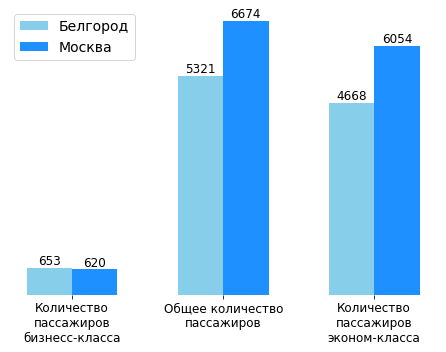

In [39]:
grath_passengers(data_image_2)

In [40]:
data_image_3 = df.pivot_table(index=['city_in'],
                              values=['total_amount',
                                      'fuel_costs',
                                      'profit'],
                              aggfunc='sum').T
data_image_3

city_in,Belgorod,Moscow
fuel_costs,3594055.83,10345171.98
profit,38321644.17,86566828.02
total_amount,41915700.00,96912000.00


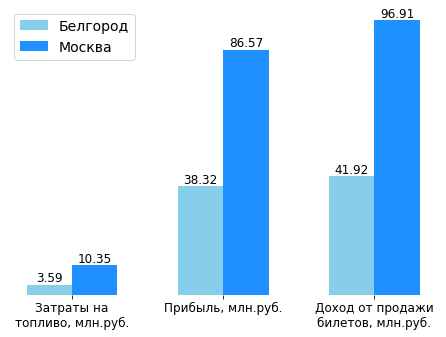

In [41]:
grath_money(data_image_3)

In [42]:
display(f"Доходы от продажи билетов = {round(df.total_amount.sum()/1000000,2)} млн.руб.")
display(f"Затраты на топливо = {round(df.fuel_costs.sum()/1000000,2)} млн.руб.")
display(f"Условная прибыль = {round(df.profit.sum()/1000000,2)} млн.руб.")

'Доходы от продажи билетов = 138.83 млн.руб.'

'Затраты на топливо = 13.94 млн.руб.'

'Условная прибыль = 124.89 млн.руб.'

Boeing летает в Москву, SSJet - в Белгород. У Boeing салон большей вместимости, чем у SSJet, однако у последего заполняемость салона выше как в целом, так и в разрезе эконом и бизнесс класса.
Как прибыль, так и затраты на приобритение авиагсм для Boeing выше, чем у SSJet, что объясняется его большими размерами, которые являются причиной большой вместимости салона и высокой нормы расхода топлива.
Большая заполняемость салона SSJet и низкий расход топлива приводят к более высокой окупаемости рейсов SSJet (в Белгород) по сравнению с рейсами Boeing (в Москву).

#### Окупаемость зимних рейсов по выборке

In [43]:
display(f"Средняя прибыль зимнего рейса = {round(df.profit.mean(),2)} руб.")
display(f"Средняя заполняемость салона = {round(df.occupancy.mean(),2)}")
display(f"Прибыль от всех зимних рейсов = {round(df.profit.sum()/1000000,2)} млн.руб.")
display(f"Окупаемость зимних рейсов по выборке = {round(df.profit.sum()/df.fuel_costs.sum(),2)}")

'Средняя прибыль зимнего рейса = 1058376.88 руб.'

'Средняя заполняемость салона = 0.9'

'Прибыль от всех зимних рейсов = 124.89 млн.руб.'

'Окупаемость зимних рейсов по выборке = 8.96'

### Преложения повышения условной окупаемости

In [44]:
data = df.drop(['flight_id', 'longitude_out', 'latitude_out',
               'longitude_in', 'latitude_in', 'seat_business'], axis=1)

In [45]:
correlation = data.corr()
round(correlation[['payback']].sort_values(by='payback', ascending=False), 2)

,payback
payback,1.00
occupancy,0.84
occupancy_class_e,0.83
business_pass,0.65
occupancy_class_b,0.65
month,0.13
dayofweek,-0.02
fuel_price,-0.13
count_pass,-0.27
economy_pass,-0.34


Основным фактором, влияющим на условную окупаемость, является процент заполняемости салона.

#### Рейсы с низкой условной прибылью и меньшей наполняемостью салона

#### Москва

In [46]:
df[(df.city_in == 'Moscow')][['flight_id', 'scheduled_departure',
                              'occupancy', 'payback']].sort_values(['payback']).head(5)

,flight_id,scheduled_departure,occupancy,payback
54,136464,2017-01-09 10:05:00+00:00,0.77,6.79
2,136122,2017-01-08 10:05:00+00:00,0.75,6.98
12,136178,2017-01-29 10:05:00+00:00,0.76,7.07
21,136250,2017-02-08 10:05:00+00:00,0.76,7.13
40,136383,2017-01-25 10:05:00+00:00,0.82,7.15


In [47]:
df[(df.city_in == 'Moscow')][['flight_id', 'scheduled_departure',
                              'occupancy', 'payback']].sort_values(['occupancy']).head(5)

,flight_id,scheduled_departure,occupancy,payback
2,136122,2017-01-08 10:05:00+00:00,0.75,6.98
38,136360,2017-02-05 10:05:00+00:00,0.75,7.50
21,136250,2017-02-08 10:05:00+00:00,0.76,7.13
12,136178,2017-01-29 10:05:00+00:00,0.76,7.07
54,136464,2017-01-09 10:05:00+00:00,0.77,6.79


#### Белгород

In [48]:
df[(df.city_in == 'Belgorod')][['flight_id', 'scheduled_departure',
                                'occupancy', 'payback']].sort_values(['payback']).head(5)

,flight_id,scheduled_departure,occupancy,payback
68,136642,2017-01-30 09:25:00+00:00,0.66,7.72
93,136807,2017-02-23 09:25:00+00:00,0.70,7.95
100,136844,2017-02-28 09:25:00+00:00,0.81,8.69
107,136887,2017-01-20 09:25:00+00:00,0.80,8.77
69,136645,2017-01-05 09:25:00+00:00,0.85,8.98


In [49]:
df[(df.city_in == 'Belgorod')][['flight_id', 'scheduled_departure',
                                'occupancy', 'payback']].sort_values(['occupancy']).head(5)

,flight_id,scheduled_departure,occupancy,payback
68,136642,2017-01-30 09:25:00+00:00,0.66,7.72
93,136807,2017-02-23 09:25:00+00:00,0.70,7.95
111,136922,2017-02-11 09:25:00+00:00,0.78,9.24
107,136887,2017-01-20 09:25:00+00:00,0.80,8.77
96,136823,2017-02-05 09:25:00+00:00,0.80,9.25


In [50]:
df_sort_m = df[(df.city_in == 'Moscow')].sort_values(['scheduled_departure'])
df_sort_b = df[(df.city_in == 'Belgorod')].sort_values(['scheduled_departure'])

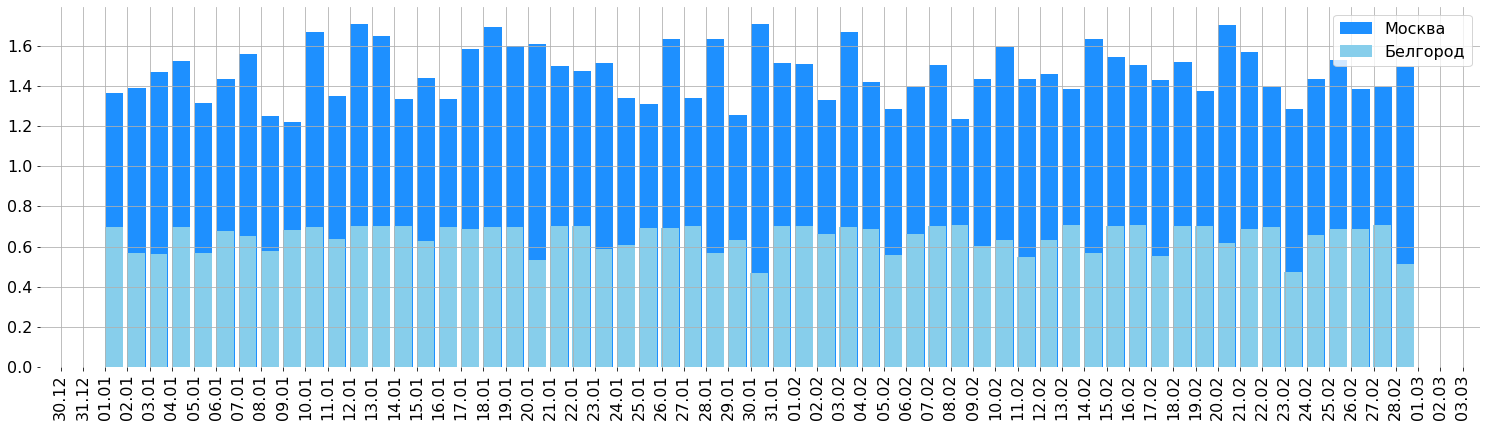

In [51]:
money_intime(df_sort_m,df_sort_b)

Окупаемость рейсов Анапа-Белгород выше, чем рейсов Анапа - Москва, но нельзя отказываться от большого количеств рейсов в столицу. Это может дать эффект только в краткосрочном периоде, поэтому следует попробовать сократить перелёты на обоих направлениях.  На основании отношения расходов на ГСМ к общему поступлению от продажи билетов и заполняемости салона можно предложить откзаться от пяти рейсов в Москву, которые совершаются 8,9,29 января, 5,8 февраля и двух рейсов в Белгород 30 января и 23 февраля. График доказывает наибольшее снижение общей прибыли в эти дни.

#### Отказ от предложеных рейсов

#### flight_id рейсов, предложенных для отказа, и их прибыль

In [52]:
df[['flight_id', 'profit']].loc[df.index.isin([2, 12, 21, 38, 54, 68, 93])]

,flight_id,profit
2,136122,1251586.45
12,136178,1256843.85
21,136250,1234557.86
38,136360,1284135.51
54,136464,1218586.45
68,136642,470090.55
93,136807,471670.50


#### Окупаемость зимних рейсов после рекомендуемых исключений

In [53]:
df2 = df.drop(df.index[[2, 12, 21, 38, 54, 68, 93]])
display(f"Средняя прибыль зимнего рейса = {round(df2.profit.mean(),2)} руб.")
display(f"Средняя заполняемость салона = {round(df2.occupancy.mean(),2)}")
display(f"Прибыль всех рейсов = {round(df2.profit.sum()/1000000,2)} млн.руб.")
display(f"Окупаемость зимних рейсов по выборке = {round(df2.profit.sum()/df2.fuel_costs.sum(),2)}")

'Средняя прибыль зимнего рейса = 1060369.38 руб.'

'Средняя заполняемость салона = 0.91'

'Прибыль всех рейсов = 117.7 млн.руб.'

'Окупаемость зимних рейсов по выборке = 9.1'

После исключения увеличилась средняя прибыль зимнего рейса, средняя наполняемость и средняя условная окупаемость 